In [1]:
%load_ext autoreload
%autoreload 2

import cPickle

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

## "Reading" sequences

In [2]:
# Load the network

from network import NetworkType, Network

lstm_net = Network(NetworkType.LSTM)

lstm_net.set_parameters('./seqgen_lstm.pkl')

map_chr_2_ind = cPickle.load(open("char_to_ind.pkl"))

Using gpu device 1: GeForce GTX TITAN X (CNMeM is disabled, cuDNN 5005)


In [3]:
# Set up state computer

from util import StateComputer

sc = StateComputer(lstm_net.cost_model, map_chr_2_ind)

In [4]:
aux_var_name = "sequencegenerator_cost_matrix_cells#2"

In [5]:
# demo_sent = "13:2 And Abram was very rich in cattle, in silver, and in gold."
demo_sent = "16:11 Seek the LORD and his strength, seek his face continually."

In [7]:
demo_computed_vars = sc.read_single_sequence(demo_sent)

In [9]:
demo_computed_vars["sequencegenerator_cost_matrix_cells#2"].shape

(64, 1, 512)

In [11]:
demo_cell = demo_computed_vars[aux_var_name].reshape((len(demo_sent),512))

In [12]:
demo_cell.shape

(64, 512)

In [21]:
from stoogeplot import hinton_diagram

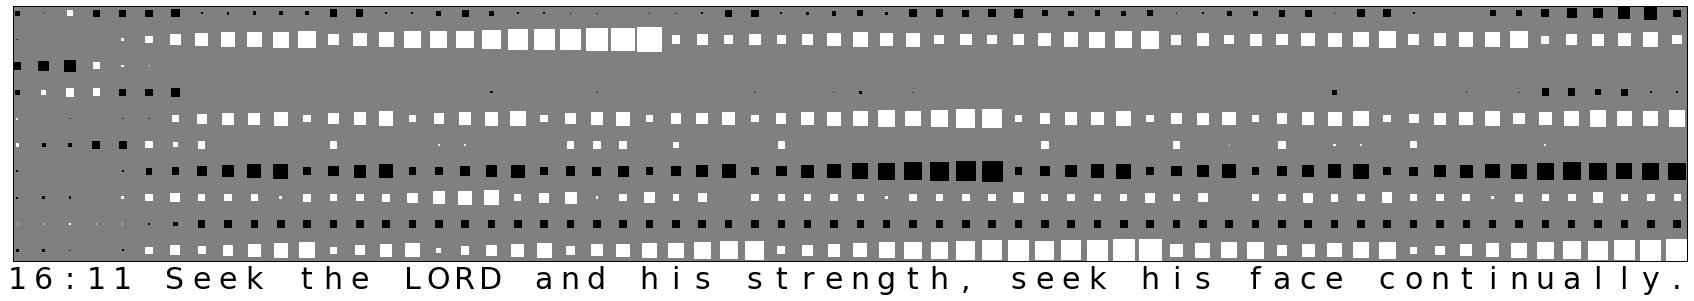

In [23]:
f = plt.figure(figsize=(30, 30))
ax = hinton_diagram(demo_cell[:,:10], xticks=demo_sent)

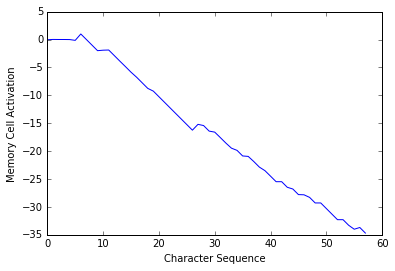

In [21]:
# ranges from 0 to len(input_char_seq) - 1
# keep cell index 11 in mind
plt.plot(demo_cell2[:,10])
plt.ylabel("Memory Cell Activation")
plt.xlabel("Character Sequence")
# sets char IDs as tick labels on the X axis
# plt.xticks(input_positions, list("cats eat mice"))
plt.show()

In [ ]:
# Get some example sequence from training data

import h5py

bible = h5py.File("bible.hdf5")

sequence = np.expand_dims(bible['character_seqs'][0], axis=1).T

In [ ]:
# Compute auxiliary variables and select last layer cells

auxiliaries = reader[2](sequence, np.ones((1, 47), dtype='f'))

# To make plotting nicer, swap seqlen and cell size axes
third_cell = auxiliaries[2].swapaxes(0, 2)

In [ ]:
# Verify consistent cell value!
# DON'T run this after the first time
third_cell_old = third_cell

In [ ]:
(third_cell_old == third_cell).all()

### Plotting Stuff...

This for now is just a demo of how easy it is to get at the various components of an NN and plot them

In [4]:
cats_mice = sc.read_single_sequence("cats eat mice")

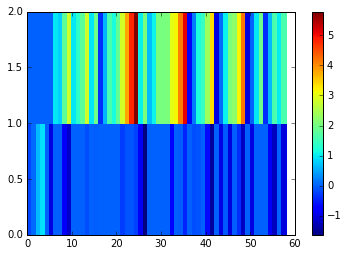

In [23]:
# f = plt.figure(figsize=(20, 20))
# plt.pcolormesh(np.expand_dims(third_cell[0][0], axis=0))
plt.pcolormesh(abram_cell2_simple[:,18:20].T)
# sets char IDs as tick labels on the X axis
# plt.xticks(input_positions, list("cats eat mice"))
# plt.yticks([])
# plt.ylim(0, 0.1)
plt.colorbar()
plt.show()

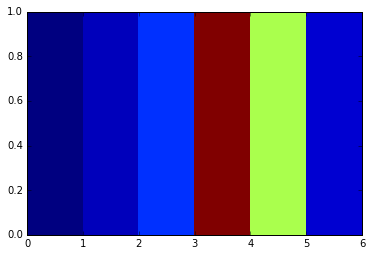

In [3]:
plt.pcolormesh(np.random.rand(1, 6))
plt.show()

## Hinton Diagrams

In [30]:
from stoogeplot import hinton_diagram

In [11]:
randomness = np.random.rand(100,25) - 0.5

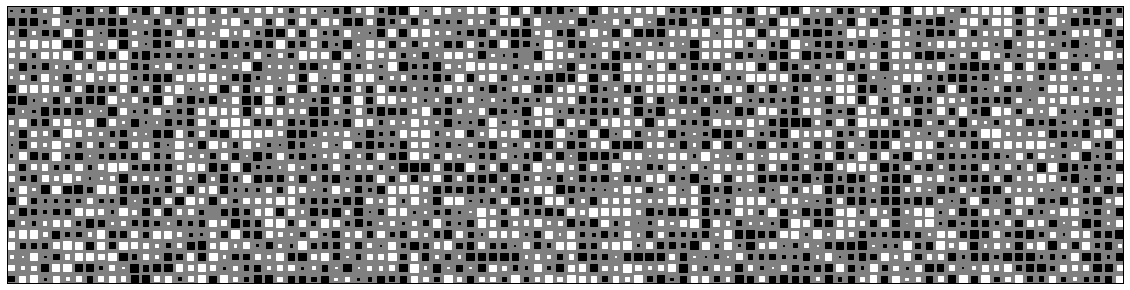

In [31]:
f = plt.figure(figsize=(20, 20))
# axes = plt.axes()
hinton_diagram(randomness)